# Bayesian vs Frequentist Statistics

One of the more hotly contested debates in statistics is of using frequentist or bayesian methods. It is necessary to describe what these are to have any hope of navigating statistics further. The explanation here is very basic and the debate between the two runs very deep.

Disclaimer: My background is primarily Bayesian.

A hilarious comparison of the pitfalls of both is shown in an xkcd article:

[Bayesian vs Frequentist](https://xkcd.com/1132/)

## Frequentism

Frequentist statisticians have a tendency to describe a result in the following way (feel free to correct me frequentists):

"I have a null hypothesis $H_0$. I have acquired data ,$D$, regarding parameters related to $H_0$. Based on the data I have acquired, and the data alone, I assign a confidence interval in my hypothesis, which means the percentage chance that this data is the result of complete chance, and my hypothese is false is 1 - this confidence interval."

Frequentism looks to the data and only the data for the approval or disapproval of hypotheses. This is not to mean it is a lesser method, many of the most popular statistical methods are frequentist in outlook. However it often relies on a theoretical infinite frequency of identical experiments.

The subtleties are greater than this and frequentists can also use prior heliefs, however frequentist methods require careful formulation to stop them _accidentally_ being bayesian. 

## Bayesianism

Bayesianism takes a slightly difference stance on statistics, in that we do not only encode our data into our model, but _also_ our prior beliefs. If our prior belief is strongly different to what the data is telling us, it will require a large amount of data to overcome these prior beliefs. 

Bayesianism is essentually an analogue of common-sense reasoning applied to statistics. Mathematically this is represented by Bayes Formula:

$$ P\big(H|D\big) = \frac{P\big(D|H\big)P(H)}{P(D)} = \frac{P\big(D \cap H\big)}{P(D)} $$

We invert the logic of "What is the probability of my hypothesis being correct given my data", and re-formulate the question as "What is the probability that my data is correct given my hypothesis, and my prior beliefs".

That's it, nothing else is required to understand the philosophy of Bayesianism. The difficulty arises in forming models and then trying to fit a model to data given often a very large number of parameters. 

This cookbook will help people form these models and implement a suitable model/data exploration strategy in the Bayesian context. This isn't out of adherence to any philosophy, I merely am most comfortable with it.

## Demonstration

We'll demonstrate this in practice using an example originally posted on R-Bloggers:
[R-Bloggers Example](https://www.r-bloggers.com/the-beta-prior-likelihood-and-posterior/)

This looks at the number of successes and failures codified by a coin flip, and is one of the simplest examples of using Bayesian Statistics in practice. To do this, we will use a Beta distribution because it has the useful property of being a model for a binomial (True\False) set of data.

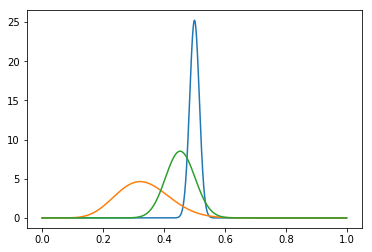

In [14]:
import numpy
import os
import matplotlib.pyplot as plt

from scipy.special import beta


def beta_distribution (x,a,b):

    return 1/beta(a,b) * numpy.power(x,a-1) * numpy.power((1 - x),b-1)

xvar = numpy.arange(0,1,0.001)

# First lets say I see 40 heads and 40 tails
b_likelihood = beta_distribution(xvar,40,40)

# My prior belief is that I will see (arbitrarily) 10 heads and 20 tails
b_prior = beta_distribution(xvar,10,20)

## This is it, this is bayes formula! Nice and simple!
b_posterior = b_likelihood * b_prior


plt.plot(xvar,b1)
plt.plot(xvar,b_prior)
plt.plot(xvar,b_posterior)
plt.show()

# The Law of Large Numbers

An important point to make from the above is that if we have a very large amount of data (causing a strong likelihood function) compared to our prior beliefs, our prior beliefs are eventually squashed into insignificance. 

This raises a curious philosophical result. Let $n_L$ be the number of datapoints measured, and $n_P$ be the number of points our prior beliefs are based off. If we keep $n_P$ fixed:

$$ \lim_{n \rightarrow \infty} : P\big(H|D\big) = P(D)$$

So in the limit of overwhelming amounts of data, the bayesian and frequentist methods often converge. This raises an even more interesting question of assigning confidence intervals (for frequentists) or credible intervals (for bayesians) on the data, as well as the subtlety's of updating our prior beliefs. 

Let's have a look visually at what this represents.

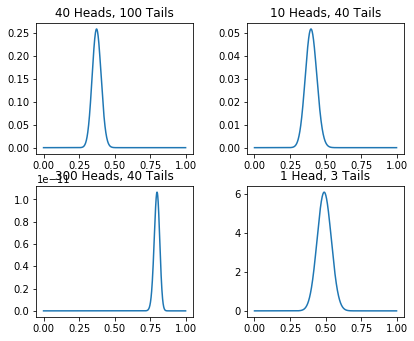

In [27]:
b_prior = beta_distribution(xvar,50,50) # Let's keep this prior fixed.

b_likelihood1 = beta_distribution(xvar,40,100)
b_likelihood2 = beta_distribution(xvar,10,40)
b_likelihood3 = beta_distribution(xvar,300,40)
b_likelihood4 = beta_distribution(xvar,1,3)

b_posterior1 = b_likelihood1 * b_prior
b_posterior2 = b_likelihood2 * b_prior
b_posterior3 = b_likelihood3 * b_prior
b_posterior4 = b_likelihood4 * b_prior

fig = plt.figure(1)

# We are beginning to change our prior beliefs. Would entice us to get more data
ax = fig.add_subplot(221)
ax.plot(xvar,b_posterior1)
ax.set_title("40 Heads, 100 Tails")

# Inconclusive still
ax2 = fig.add_subplot(222)
ax2.plot(xvar,b_posterior2)
ax2.set_title("10 Heads, 40 Tails")

# More than enough data to overrule our prior and convince us of a biased coin.
ax3 = fig.add_subplot(223)
ax3.plot(xvar,b_posterior3)
ax3.set_title("300 Heads, 40 Tails")

# Nowhere near enough data for our likelihood to overrule our prior beliefs
# as seen in the resulting posterior distribution.
ax4 = fig.add_subplot(224)
ax4.plot(xvar,b_posterior4)
ax4.set_title("1 Head, 3 Tails")
plt.subplots_adjust(top=1.1, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()